In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model 
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import re
import numpy as np

import matplotlib.pyplot as plt

### Data load
#### Data description: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/wine.csv'
df = pd.read_csv(url, header=None)

### Data shuffling and sampling

In [3]:
df = df.sample(frac=1.0)
dataset = df.values
X = dataset[:, :12]
Y = dataset[:, 12]
X.shape, Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

### Model structure 

In [4]:
def WineModel ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = Dense(30, activation='relu')(Inp)
    Hidden2 = Dense(12, activation='relu')(Hidden1)
    Hidden3 = Dense(8, activation='relu')(Hidden2)
    Output = Dense(1, activation='sigmoid')(Hidden3)

    return Model(Inp, Output)

Wine = WineModel()
Wine.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

### Model save directory setting

In [5]:
save_path = './Results/'
if not os.path.exists(save_path):
    os.mkdir(save_path)


### Model save environment setting: Saving the model training result with the same name over epochs if the training performance improves. 

In [6]:
ModelSaveSameName = save_path+'WineM.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)

In [7]:
Wine.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=200, batch_size=300,  verbose=1, callbacks=[ModelSave])

Epoch 1/200
18/18 [==============================] - 2s 80ms/step - loss: 11.0278 - accuracy: 0.3409 - val_loss: 0.6211 - val_accuracy: 0.8269

Epoch 00001: val_loss improved from inf to 0.62114, saving model to ./Results\WineM.hdf5
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7251 - accuracy: 0.8106 - val_loss: 0.7068 - val_accuracy: 0.8362

Epoch 00002: val_loss did not improve from 0.62114
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.5556 - accuracy: 0.8596 - val_loss: 0.2700 - val_accuracy: 0.9023

Epoch 00003: val_loss improved from 0.62114 to 0.27004, saving model to ./Results\WineM.hdf5
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2341 - accuracy: 0.9092 - val_loss: 0.2119 - val_accuracy: 0.9346

Epoch 00004: val_loss improved from 0.27004 to 0.21191, saving model to ./Results\WineM.hdf5
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2176 - accuracy: 0.9264 - val

### Model weight load and evaluate it 

In [8]:
WineRe = WineModel()
WineRe.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
print('Before loading weights')
print(WineRe.evaluate(X_test,Y_test))
print()

WineRe.load_weights(ModelSaveSameName)
print('After loading weights')
print(WineRe.evaluate(X_test,Y_test))

Before loading weights
41/41 [==============================] - 0s 2ms/step - loss: 8.8674 - accuracy: 0.2515
[9.07166576385498, 0.2507692277431488]

After loading weights
41/41 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9854
[0.040378961712121964, 0.9853846430778503]


### Model save environment setting: Saving the model training result with a different name for each epoch if the training performance improves. 

In [9]:
Wine = WineModel()
Wine.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

ModelSaveDiffName = save_path+'Epoch-{epoch:02d}_Loss-{loss:.4f}_ValLoss-{val_loss:.4f}-.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveDiffName, monitor='val_loss', verbose=0, save_best_only=True)

In [10]:
Wine.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200,  verbose=1, callbacks=[ModelSave])

Epoch 1/200
26/26 [==============================] - 0s 7ms/step - loss: 0.8176 - accuracy: 0.7651 - val_loss: 0.3732 - val_accuracy: 0.7685
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 0.3204 - accuracy: 0.8164 - val_loss: 0.2680 - val_accuracy: 0.9038
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 0.2399 - accuracy: 0.9130 - val_loss: 0.2229 - val_accuracy: 0.9277
Epoch 4/200
26/26 [==============================] - 0s 5ms/step - loss: 0.2172 - accuracy: 0.9283 - val_loss: 0.2121 - val_accuracy: 0.9277
Epoch 5/200
26/26 [==============================] - 0s 5ms/step - loss: 0.2097 - accuracy: 0.9282 - val_loss: 0.2087 - val_accuracy: 0.9277
Epoch 6/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1951 - accuracy: 0.9323 - val_loss: 0.2064 - val_accuracy: 0.9292
Epoch 7/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1884 - accuracy: 0.9356 - val_loss: 0.2049 - val_accuracy: 0.9292
Epoch 8/200
2

### Plot loss graphs

Text(0, 0.5, 'loss')

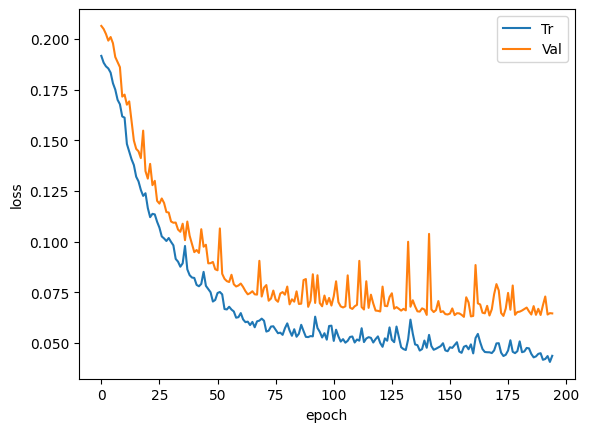

In [11]:
StartIDX = 5
plt.plot(Wine.history.history['loss'][StartIDX:], label='Tr')
plt.plot(Wine.history.history['val_loss'][StartIDX:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Review saved model weights

In [12]:
FileList = os.listdir(save_path)
FileList = [re.split('-|_', i) for i in FileList if 'Val' in i] # select files with 'val'

FileListDF= pd.DataFrame(FileList)
FileListDF = FileListDF.drop(columns=[0,2,4,6])
FileListDF = FileListDF.rename(columns={1:'Epoch',3:'Loss',5:'VallLoss'})
FileListDF = FileListDF.astype('float32')

FileListDF['MeanLosses'] = (FileListDF['Loss'] + FileListDF['VallLoss'])/2
FileListDF = FileListDF.sort_values('Epoch')

### Plot loss graphs

Text(0, 0.5, 'loss')

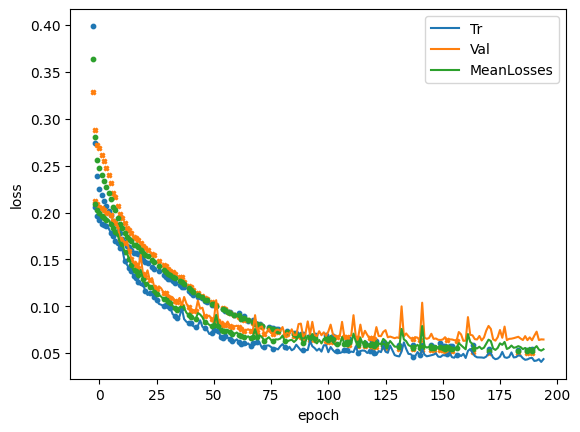

In [13]:
StartIDX = 5
plt.plot(Wine.history.history['loss'][StartIDX:], label='Tr')
plt.scatter(FileListDF['Epoch'][StartIDX:]-StartIDX-1, FileListDF['Loss'][StartIDX:], s=10)

plt.plot(Wine.history.history['val_loss'][StartIDX:], label='Val')
plt.scatter(FileListDF['Epoch'][StartIDX:]-StartIDX-1, FileListDF['VallLoss'][StartIDX:], s=10, marker='X')

MeanLosses = (np.array(Wine.history.history['loss']) + np.array(Wine.history.history['val_loss']))/2
plt.plot(MeanLosses[StartIDX:], label='MeanLosses')
plt.scatter(FileListDF['Epoch'][StartIDX:]-StartIDX-1, FileListDF['MeanLosses'][StartIDX:], s=10)

plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')